In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [24]:
df = pd.read_csv("LoanApprovalPrediction (1).csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [50]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df.drop(['Loan_ID'], axis=1, inplace=True)
df.fillna(method='ffill', inplace=True)


C:\Users\user5\AppData\Local\Temp\ipykernel_2972\4099236065.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [26]:
df.dropna(inplace=True)


In [54]:
df.drop_duplicates(inplace=True)


In [27]:
label_encoders = {}
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


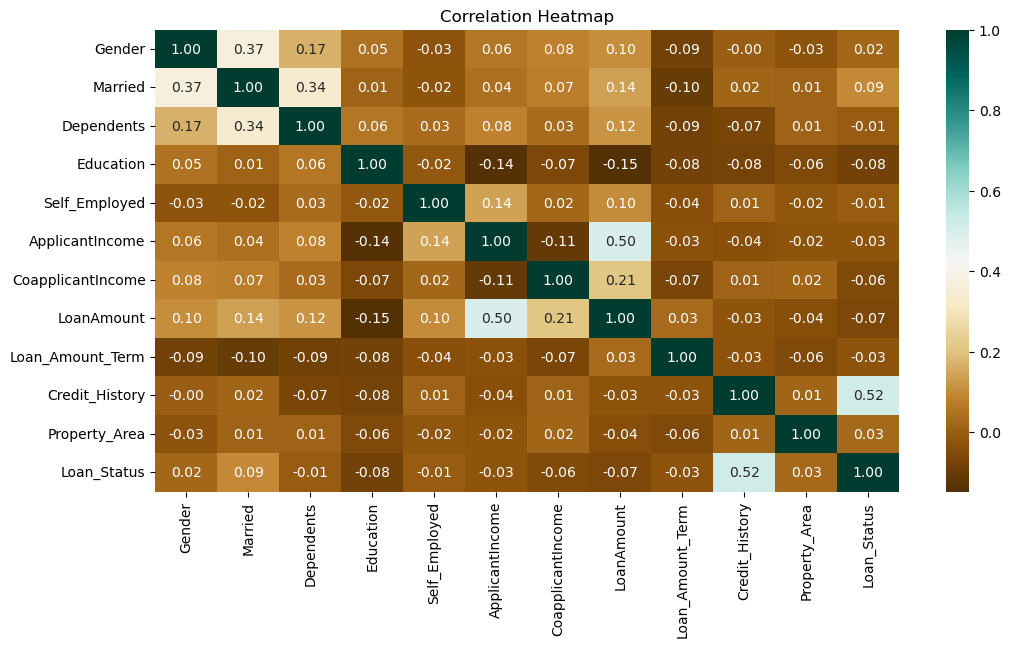

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='BrBG', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [29]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [42]:
y_pred = logistic_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.39      0.54        38
           1       0.77      0.96      0.86        82

    accuracy                           0.78       120
   macro avg       0.80      0.68      0.70       120
weighted avg       0.79      0.78      0.76       120



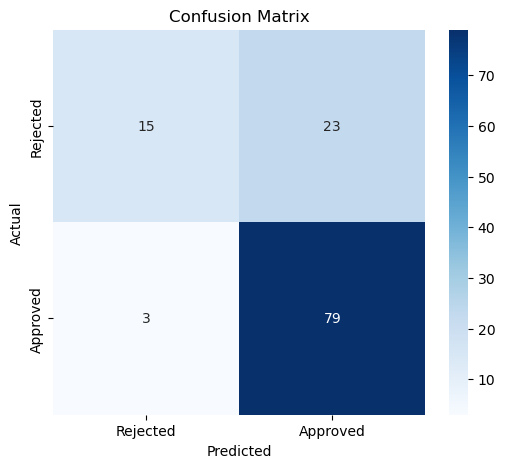

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected','Approved'], yticklabels=['Rejected','Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


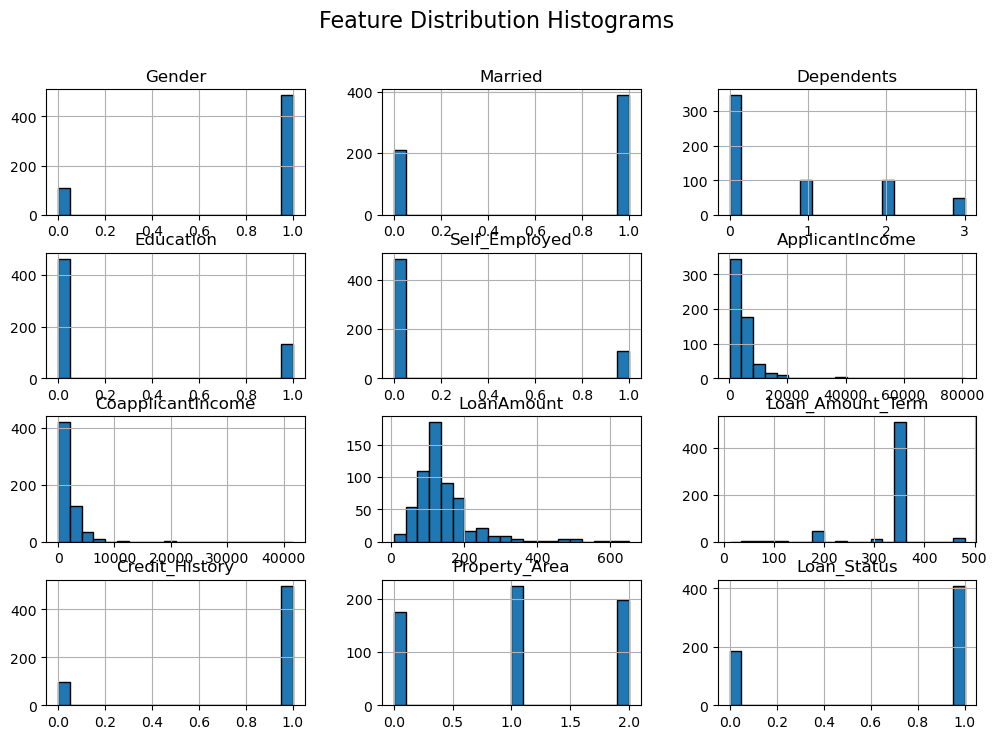

In [46]:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distribution Histograms", fontsize=16)
plt.show()


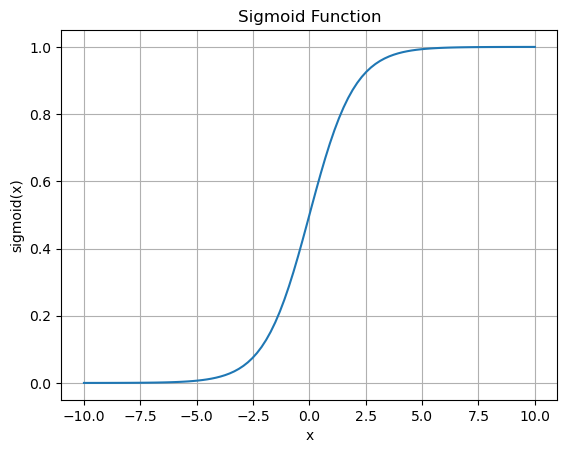

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function definition
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example usage and plot
x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()
